Topic: Maryland Housing Model

Personal Project

Garrett Fanning

# Introduction

# Data Description

## Source

https://www.census.gov/programs-surveys/popest/data/tables.html
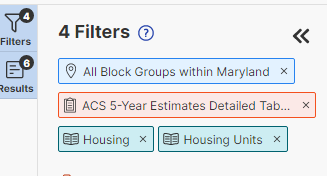

https://data.census.gov/cedsci/

## Feature Breakdown

**Housing** - Number of houses in a block
<br> **Population** - Population in a block
<br> **Earnings** - Median Earnings in a block
<br> **Poverty** - Number living in poverty(based on Census income threshold) in a block
<br> **Employment** - Number of people employed in a block
<br> **Rooms** - Median number of rooms per house in a block
<br> **Children** - Number of children in a block
<br> **HouseType** - Number of houses occupied
<br> **Age** - Median Age of a block
<br> **Transportation** - Median length of commute to work
<br> **HousePrice** - Median price of a home in a block
<br> **School** - Number of schools in a block

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Data Breakdown

## Maryland Housing Data

In [3]:
Maryland_Housing = pd.read_csv('Maryland_Housing_2020.csv', names = ["Units","Unit_Error", "GEO_ID","Name"])
Maryland_Housing_2013 = pd.read_csv('Maryland_Housing_2013.csv', names = ["Units","Unit_Error", "GEO_ID","Name"])
Maryland_Housing_2013 = Maryland_Housing_2013[2:]
Maryland_Housing_2013['Year'] = 2013

Maryland_Housing_2014 = pd.read_csv('Maryland_Housing_2014.csv', names = ["Units","Unit_Error", "GEO_ID","Name"])
Maryland_Housing_2014 = Maryland_Housing_2014[2:]
Maryland_Housing_2014['Year'] = 2014

Maryland_Housing_2015 = pd.read_csv('Maryland_Housing_2015.csv', names = ["Units","Unit_Error", "GEO_ID","Name"])
Maryland_Housing_2015 = Maryland_Housing_2015[2:]
Maryland_Housing_2015['Year'] = 2015

Maryland_Housing_2016 = pd.read_csv('Maryland_Housing_2016.csv', names = ["Units","Unit_Error", "GEO_ID","Name"])
Maryland_Housing_2016 = Maryland_Housing_2016[2:]
Maryland_Housing_2016['Year'] = 2016

Maryland_Housing_2017 = pd.read_csv('Maryland_Housing_2017.csv', names = ["Units","Unit_Error", "GEO_ID","Name"])
Maryland_Housing_2017 = Maryland_Housing_2017[2:]
Maryland_Housing_2017['Year'] = 2017

Maryland_Housing_2017 = pd.read_csv('Maryland_Housing_2017.csv', names = ["Units","Unit_Error", "GEO_ID","Name"])
Maryland_Housing_2017 = Maryland_Housing_2017[2:]
Maryland_Housing_2017['Year'] = 2017

Maryland_Housing_2018 = pd.read_csv('Maryland_Housing_2018.csv', names = ["Units","Unit_Error", "GEO_ID","Name"])
Maryland_Housing_2018 = Maryland_Housing_2018[2:]
Maryland_Housing_2018['Year'] = 2018

Maryland_Housing_2019 = pd.read_csv('Maryland_Housing_2019.csv', names = ["Units","Unit_Error", "GEO_ID","Name"])
Maryland_Housing_2019 = Maryland_Housing_2019[2:]
Maryland_Housing_2019['Year'] = 2019

Maryland_Housing_2020 = pd.read_csv('Maryland_Housing_2020.csv', names = ["Units","Unit_Error", "GEO_ID","Name"])
Maryland_Housing_2020 = Maryland_Housing_2020[2:]
Maryland_Housing_2020['Year'] = 2020

Maryland_Housing_Combined = Maryland_Housing_2013.append(Maryland_Housing_2014).append(Maryland_Housing_2015).append(Maryland_Housing_2016).append(Maryland_Housing_2017).append(Maryland_Housing_2018).append(Maryland_Housing_2019).append(Maryland_Housing_2020)
Maryland_Housing_Combined

,Units,Unit_Error,GEO_ID,Name,Year
2,414,72,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County...",2013
3,925,117,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County...",2013
4,583,94,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County...",2013
5,493,71,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County...",2013
6,402,64,1500000US240010002002,"Block Group 2, Census Tract 2, Allegany County...",2013
...,...,...,...,...,...
4076,274,78,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci...",2020
4077,262,77,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci...",2020
4078,518,116,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci...",2020
4079,508,105,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci...",2020


In [6]:
Maryland_Housing = Maryland_Housing_Combined.drop("Unit_Error",axis = 1)
Maryland_Housing['Units'] = Maryland_Housing['Units'].astype(int).astype(float)
Maryland_Housing

,Units,GEO_ID,Name,Year
2,414.0,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County...",2013
3,925.0,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County...",2013
4,583.0,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County...",2013
5,493.0,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County...",2013
6,402.0,1500000US240010002002,"Block Group 2, Census Tract 2, Allegany County...",2013
...,...,...,...,...
4076,274.0,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci...",2020
4077,262.0,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci...",2020
4078,518.0,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci...",2020
4079,508.0,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci...",2020


In [8]:
Maryland_Housing = Maryland_Housing.loc[(Maryland_Housing['Units']>0)]
Maryland_Housing['Units'].describe()

count    31277.000000
mean       619.997154
std        338.489015
min          3.000000
25%        394.000000
50%        551.000000
75%        776.000000
max       5717.000000
Name: Units, dtype: float64

([<matplotlib.axis.XTick at 0x16880283c40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

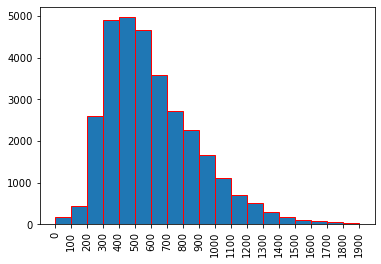

In [11]:
Maryland_Housing = Maryland_Housing.sort_values(by = 'Units')

plt.hist(Maryland_Housing['Units'],edgecolor = "red", bins=range(0,2000,100))
plt.xticks(range(0,2000,100), rotation=90)

In [12]:
Maryland_Housing.loc[(Maryland_Housing['Units']>Maryland_Housing['Units'].mean())].shape[0]/len(Maryland_Housing)

0.40560156025194233

In [13]:
Maryland_Housing.loc[(Maryland_Housing['Units']==Maryland_Housing['Units'].max()),('Name','Year')]

,Name,Year
3230,"Block Group 2, Census Tract 9501, Worcester Co...",2019


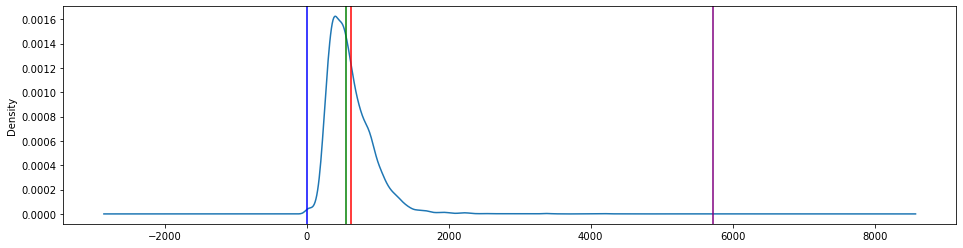

In [14]:
ax = Maryland_Housing['Units'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Housing['Units'].mean(),color='red')
ax.axvline(Maryland_Housing['Units'].median(),color='green')
ax.axvline(Maryland_Housing['Units'].min(),color='blue')
ax.axvline(Maryland_Housing['Units'].max(),color='purple')

## Maryland Population Data

In [2]:
Maryland_Population_2013 = pd.read_csv('Maryland_Population_2013.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2013 = Maryland_Population_2013[2:]
Maryland_Population_2013['Year'] = 2013

Maryland_Population_2014 = pd.read_csv('Maryland_Population_2014.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2014 = Maryland_Population_2014[2:]
Maryland_Population_2014['Year'] = 2014

Maryland_Population_2015 = pd.read_csv('Maryland_Population_2015.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2015 = Maryland_Population_2015[2:]
Maryland_Population_2015['Year'] = 2015

Maryland_Population_2016 = pd.read_csv('Maryland_Population_2016.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2016 = Maryland_Population_2016[2:]
Maryland_Population_2016['Year'] = 2016

Maryland_Population_2017 = pd.read_csv('Maryland_Population_2017.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2017 = Maryland_Population_2017[2:]
Maryland_Population_2017['Year'] = 2017

Maryland_Population_2017 = pd.read_csv('Maryland_Population_2017.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2017 = Maryland_Population_2017[2:]
Maryland_Population_2017['Year'] = 2017

Maryland_Population_2018 = pd.read_csv('Maryland_Population_2018.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2018 = Maryland_Population_2018[2:]
Maryland_Population_2018['Year'] = 2018

Maryland_Population_2019 = pd.read_csv('Maryland_Population_2019.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2019 = Maryland_Population_2019[2:]
Maryland_Population_2019['Year'] = 2019

Maryland_Population_2020 = pd.read_csv('Maryland_Population_2020.csv', names = ["Population","Population_Error", "GEO_ID","Name"])
Maryland_Population_2020 = Maryland_Population_2020[2:]
Maryland_Population_2020['Year'] = 2020

Maryland_Population_Combined = Maryland_Population_2013.append(Maryland_Population_2014).append(Maryland_Population_2015).append(Maryland_Population_2016).append(Maryland_Population_2017).append(Maryland_Population_2018).append(Maryland_Population_2019).append(Maryland_Population_2020)
Maryland_Population_Combined

,Population,Population_Error,GEO_ID,Name,Year
2,620,183,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County...",2013
3,1700,262,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County...",2013
4,1257,321,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County...",2013
5,933,206,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County...",2013
6,739,165,1500000US240010002002,"Block Group 2, Census Tract 2, Allegany County...",2013
...,...,...,...,...,...
4076,333,109,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci...",2020
4077,481,220,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci...",2020
4078,1023,389,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci...",2020
4079,1238,371,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci...",2020


In [28]:
Maryland_Population = Maryland_Population_Combined.drop("Population_Error",axis = 1)
Maryland_Population['Population'] = Maryland_Population['Population'].astype(int).astype(float)
Maryland_Population

,Population,GEO_ID,Name,Year
2,620.0,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County...",2013
3,1700.0,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County...",2013
4,1257.0,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County...",2013
5,933.0,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County...",2013
6,739.0,1500000US240010002002,"Block Group 2, Census Tract 2, Allegany County...",2013
...,...,...,...,...
4076,333.0,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci...",2020
4077,481.0,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci...",2020
4078,1023.0,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci...",2020
4079,1238.0,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci...",2020


In [31]:
Maryland_Population = Maryland_Population.loc[(Maryland_Population['Population']>0)]
Maryland_Population['Population'].describe()

count    31353.000000
mean      1520.380857
std        805.315046
min          3.000000
25%        939.000000
50%       1366.000000
75%       1955.000000
max      13709.000000
Name: Population, dtype: float64

In [57]:
Maryland_Population = Maryland_Population.sort_values(by = 'Population')

plt.hist(Maryland_Population['Population'],edgecolor = "red", bins=range(0,3000,100))
plt.xticks(range(0,3000,100), rotation=90)

NameError: name 'Maryland_Population' is not defined

In [38]:
Maryland_Population.loc[(Maryland_Population['Population']>Maryland_Population['Population'].mean())].shape[0]/len(Maryland_Population)

0.42196918955123913

In [45]:
Maryland_Population.loc[(Maryland_Population['Population']==Maryland_Population['Population'].max()),('Name','Year')]

,Name,Year
3083,"Block Group 1, Census Tract 9800, Prince Georg...",2020


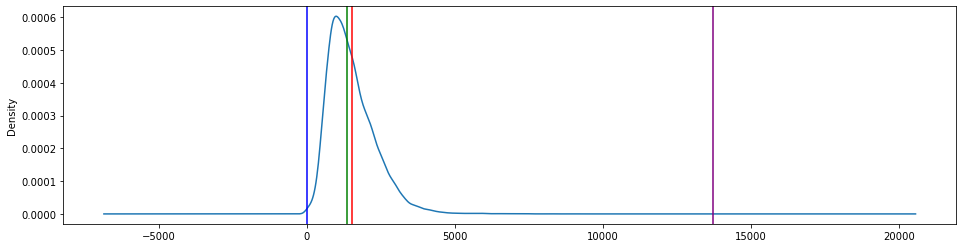

In [46]:
ax = Maryland_Population['Population'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Population['Population'].mean(),color='red')
ax.axvline(Maryland_Population['Population'].median(),color='green')
ax.axvline(Maryland_Population['Population'].min(),color='blue')
ax.axvline(Maryland_Population['Population'].max(),color='purple')

## Maryland Earnings Data

In [55]:
Maryland_Earnings_2017 = pd.read_csv('Maryland_Earnings_2017.csv')
Maryland_Earnings_2017 = Maryland_Earnings_2017[1:]
Maryland_Earnings_2017 = Maryland_Earnings_2017[["B20017_001E","GEO_ID","NAME"]]
Maryland_Earnings_2017 = Maryland_Earnings_2017.rename(columns = {"B20017_001E":"Earnings","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Earnings_2017['Year'] = 2017

Maryland_Earnings_2018 = pd.read_csv('Maryland_Earnings_2018.csv')
Maryland_Earnings_2018 = Maryland_Earnings_2018[1:]
Maryland_Earnings_2018 = Maryland_Earnings_2018[["B20017_001E","GEO_ID","NAME"]]
Maryland_Earnings_2018 = Maryland_Earnings_2018.rename(columns = {"B20017_001E":"Earnings","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Earnings_2018['Year'] = 2018

Maryland_Earnings_2019 = pd.read_csv('Maryland_Earnings_2019.csv')
Maryland_Earnings_2019 = Maryland_Earnings_2019[1:]
Maryland_Earnings_2019 = Maryland_Earnings_2019[["B20017_001E","GEO_ID","NAME"]]
Maryland_Earnings_2019 = Maryland_Earnings_2019.rename(columns = {"B20017_001E":"Earnings","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Earnings_2019['Year'] = 2019

Maryland_Earnings_2020 = pd.read_csv('Maryland_Earnings_2020.csv')
Maryland_Earnings_2020 = Maryland_Earnings_2020[1:]
Maryland_Earnings_2020 = Maryland_Earnings_2020[["B20017_001E","GEO_ID","NAME"]]
Maryland_Earnings_2020 = Maryland_Earnings_2020.rename(columns = {"B20017_001E":"Earnings","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Earnings_2020['Year'] = 2020

Maryland_Earnings_Combined = Maryland_Earnings_2017.append(Maryland_Earnings_2018).append(Maryland_Earnings_2019).append(Maryland_Earnings_2020)
Maryland_Earnings_Combined

,Earnings,GEO_ID,Name,Year
1,-,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County...",2017
2,30434,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County...",2017
3,35317,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County...",2017
4,28917,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County...",2017
5,25720,1500000US240010002002,"Block Group 2, Census Tract 2, Allegany County...",2017
...,...,...,...,...
4075,29063,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci...",2020
4076,4258,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci...",2020
4077,11989,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci...",2020
4078,22833,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci...",2020


In [56]:
Maryland_Earnings = Maryland_Earnings_Combined[Maryland_Earnings_Combined["Earnings"].str.contains("-") == False].copy()
Maryland_Earnings['Earnings'] = Maryland_Earnings['Earnings'].astype(int).astype(float)
Maryland_Earnings['Earnings'].describe()

count     15216.000000
mean      47533.584122
std       20039.950245
min        2541.000000
25%       33518.250000
50%       43869.500000
75%       56540.000000
max      186773.000000
Name: Earnings, dtype: float64

([<matplotlib.axis.XTick at 0x1688621c310>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

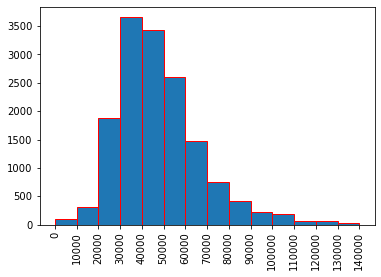

In [58]:
Maryland_Earnings = Maryland_Earnings.sort_values(by = 'Earnings')

plt.hist(Maryland_Earnings['Earnings'],edgecolor = "red", bins=range(0,150000,10000))
plt.xticks(range(0,150000,10000), rotation=90)

In [59]:
Maryland_Earnings.loc[(Maryland_Earnings['Earnings']>Maryland_Earnings['Earnings'].mean())].shape[0]/len(Maryland_Earnings)

0.427773396424816

In [61]:
Maryland_Earnings.loc[(Maryland_Earnings['Earnings']==Maryland_Earnings['Earnings'].max()),('Earnings','Name','Year')]

,Earnings,Name,Year
3835,186773.0,"Block Group 4, Census Tract 2712, Baltimore ci...",2018


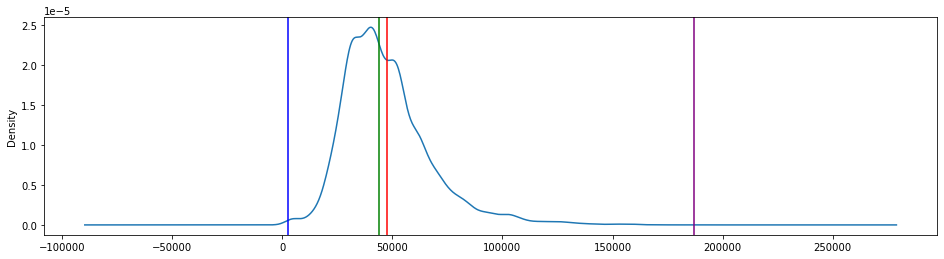

In [62]:
ax = Maryland_Earnings['Earnings'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Earnings['Earnings'].mean(),color='red')
ax.axvline(Maryland_Earnings['Earnings'].median(),color='green')
ax.axvline(Maryland_Earnings['Earnings'].min(),color='blue')
ax.axvline(Maryland_Earnings['Earnings'].max(),color='purple')

## Maryland Poverty Data

In [4]:
#Maryland_Poverty_Sort = Maryland_Poverty_Sort[["B23024_001E","GEO_ID","NAME"]]

Maryland_Poverty_2013 = pd.read_csv('Maryland_Poverty_2013.csv')
Maryland_Poverty_2013 = Maryland_Poverty_2013[["B23024_001E","GEO_ID","NAME"]]
Maryland_Poverty_2013 = Maryland_Poverty_2013[1:]
Maryland_Poverty_2013 = Maryland_Poverty_2013.rename(columns = {"B23024_001E":"Poverty","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Poverty_2013['Year'] = 2013

Maryland_Poverty_2014 = pd.read_csv('Maryland_Poverty_2014.csv')
Maryland_Poverty_2014 = Maryland_Poverty_2014[["B23024_001E","GEO_ID","NAME"]]
Maryland_Poverty_2014 = Maryland_Poverty_2014[1:]
Maryland_Poverty_2014 = Maryland_Poverty_2014.rename(columns = {"B23024_001E":"Poverty","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Poverty_2014['Year'] = 2014

Maryland_Poverty_2015 = pd.read_csv('Maryland_Poverty_2015.csv')
Maryland_Poverty_2015 = Maryland_Poverty_2015[["B23024_001E","GEO_ID","NAME"]]
Maryland_Poverty_2015 = Maryland_Poverty_2015[1:]
Maryland_Poverty_2015 = Maryland_Poverty_2015.rename(columns = {"B23024_001E":"Poverty","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Poverty_2015['Year'] = 2015

Maryland_Poverty_2016 = pd.read_csv('Maryland_Poverty_2016.csv')
Maryland_Poverty_2016 = Maryland_Poverty_2016[["B23024_001E","GEO_ID","NAME"]]
Maryland_Poverty_2016 = Maryland_Poverty_2016[1:]
Maryland_Poverty_2016 = Maryland_Poverty_2016.rename(columns = {"B23024_001E":"Poverty","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Poverty_2016['Year'] = 2016

Maryland_Poverty_2017 = pd.read_csv('Maryland_Poverty_2017.csv')
Maryland_Poverty_2017 = Maryland_Poverty_2017[["B23024_001E","GEO_ID","NAME"]]
Maryland_Poverty_2017 = Maryland_Poverty_2017[1:]
Maryland_Poverty_2017 = Maryland_Poverty_2017.rename(columns = {"B23024_001E":"Poverty","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Poverty_2017['Year'] = 2017

Maryland_Poverty_2018 = pd.read_csv('Maryland_Poverty_2018.csv')
Maryland_Poverty_2018 = Maryland_Poverty_2018[["B23024_001E","GEO_ID","NAME"]]
Maryland_Poverty_2018 = Maryland_Poverty_2018[1:]
Maryland_Poverty_2018 = Maryland_Poverty_2018.rename(columns = {"B23024_001E":"Poverty","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Poverty_2018['Year'] = 2018

Maryland_Poverty_2019 = pd.read_csv('Maryland_Poverty_2019.csv')
Maryland_Poverty_2019 = Maryland_Poverty_2019[["B23024_001E","GEO_ID","NAME"]]
Maryland_Poverty_2019 = Maryland_Poverty_2019[1:]
Maryland_Poverty_2019 = Maryland_Poverty_2019.rename(columns = {"B23024_001E":"Poverty","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Poverty_2019['Year'] = 2019

Maryland_Poverty_2020 = pd.read_csv('Maryland_Poverty_2020.csv')
Maryland_Poverty_2020 = Maryland_Poverty_2020[["B23024_001E","GEO_ID","NAME"]]
Maryland_Poverty_2020 = Maryland_Poverty_2020[1:]
Maryland_Poverty_2020 = Maryland_Poverty_2020.rename(columns = {"B23024_001E":"Poverty","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Poverty_2020['Year'] = 2020

Maryland_Poverty_Combined = Maryland_Poverty_2013.append(Maryland_Poverty_2014).append(Maryland_Poverty_2015).append(Maryland_Poverty_2016).append(Maryland_Poverty_2017).append(Maryland_Poverty_2018).append(Maryland_Poverty_2019).append(Maryland_Poverty_2020)
Maryland_Poverty_Combined

,Poverty,GEO_ID,Name,Year
1,310,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County...",2013
2,861,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County...",2013
3,694,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County...",2013
4,616,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County...",2013
5,482,1500000US240010002002,"Block Group 2, Census Tract 2, Allegany County...",2013
...,...,...,...,...
4075,259,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci...",2020
4076,155,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci...",2020
4077,680,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci...",2020
4078,530,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci...",2020


In [6]:
Maryland_Poverty = Maryland_Poverty_Combined[Maryland_Poverty_Combined["Poverty"].str.contains("-") == False].copy()
Maryland_Poverty['Poverty'] = Maryland_Poverty['Poverty'].astype(int).astype(float)
Maryland_Poverty = Maryland_Poverty.loc[(Maryland_Poverty['Poverty']>0)]
Maryland_Poverty['Poverty'].describe()

count    31259.000000
mean       909.165872
std        497.273967
min          3.000000
25%        550.000000
50%        813.000000
75%       1180.000000
max       5621.000000
Name: Poverty, dtype: float64

In [7]:
Maryland_Poverty.loc[(Maryland_Poverty['Poverty']>Maryland_Poverty['Poverty'].mean())].shape[0]/len(Maryland_Poverty)

0.42064685370613264

In [11]:
Maryland_Poverty.loc[(Maryland_Poverty['Poverty']==Maryland_Poverty['Poverty'].max()),('Poverty','Name','Year')]

,Poverty,Name,Year
152,5621.0,"Block Group 3, Census Tract 7301, Anne Arundel...",2019


([<matplotlib.axis.XTick at 0x29a20853b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

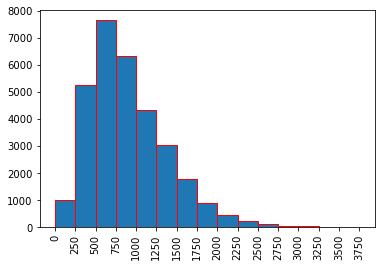

In [13]:
Maryland_Poverty = Maryland_Poverty.sort_values(by = 'Poverty')

plt.hist(Maryland_Poverty['Poverty'],edgecolor = "red", bins=range(0,4000,250))
plt.xticks(range(0,4000,250), rotation=90)

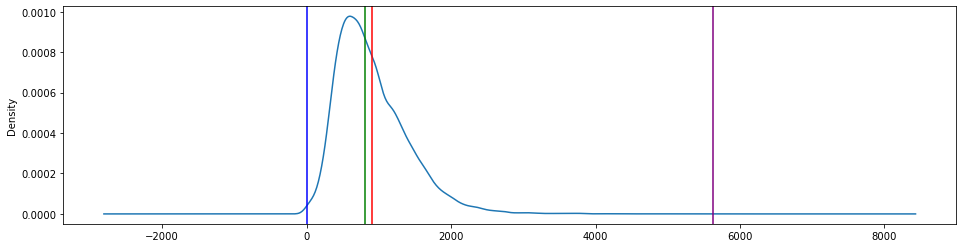

In [14]:
ax = Maryland_Poverty['Poverty'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Poverty['Poverty'].mean(),color='red')
ax.axvline(Maryland_Poverty['Poverty'].median(),color='green')
ax.axvline(Maryland_Poverty['Poverty'].min(),color='blue')
ax.axvline(Maryland_Poverty['Poverty'].max(),color='purple')

## Maryland Employment Data

In [25]:
Maryland_Employment = pd.read_csv('Maryland_Employment_2020.csv')
Maryland_Employment_Sort = Maryland_Employment[1:]
Maryland_Employment_Sort = Maryland_Employment_Sort[["B23025_001E","GEO_ID","NAME"]]
Maryland_Employment_Sort = Maryland_Employment_Sort.rename(columns = {"B23025_001E":"Employment","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Employment_Sort= Maryland_Employment_Sort.sort_values(by="Employment")
Maryland_Employment_Sort

,Employment,GEO_ID,Name
2683,0,1500000US240338011061,"Block Group 1, Census Tract 8011.06, Prince Ge..."
3789,0,1500000US245102404002,"Block Group 2, Census Tract 2404, Baltimore ci..."
2043,0,1500000US240317008184,"Block Group 4, Census Tract 7008.18, Montgomer..."
3288,0,1500000US240430108023,"Block Group 3, Census Tract 108.02, Washington..."
3117,0,1500000US240359902000,"Block Group 0, Census Tract 9902, Queen Anne's..."
...,...,...,...
2007,997,1500000US240317007243,"Block Group 3, Census Tract 7007.24, Montgomer..."
2823,997,1500000US240338023013,"Block Group 3, Census Tract 8023.01, Prince Ge..."
1023,998,1500000US240135010023,"Block Group 3, Census Tract 5010.02, Carroll C..."
3970,999,1500000US245102709023,"Block Group 3, Census Tract 2709.02, Baltimore..."


In [26]:
Maryland_Employment_Sort['Employment'] = Maryland_Employment_Sort['Employment'].astype(str).astype(float)
Maryland_Employment_Sort = Maryland_Employment_Sort.loc[(Maryland_Employment_Sort['Employment']>0)]
Maryland_Employment_Sort['Employment'].describe()

count     4036.000000
mean      1200.712587
std        627.781155
min          7.000000
25%        764.000000
50%       1096.500000
75%       1527.250000
max      13659.000000
Name: Employment, dtype: float64

In [27]:
Maryland_Employment_Sort.loc[(Maryland_Employment_Sort['Employment']>Maryland_Employment_Sort['Employment'].mean())].shape[0]

1750

In [28]:
Maryland_Employment_Sort.loc[(Maryland_Employment_Sort['Employment']==Maryland_Employment_Sort['Employment'].max()),'Name'].unique()

array(["Block Group 1, Census Tract 9800, Prince George's County, Maryland"],
      dtype=object)

([<matplotlib.axis.XTick at 0x1c5887efb50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

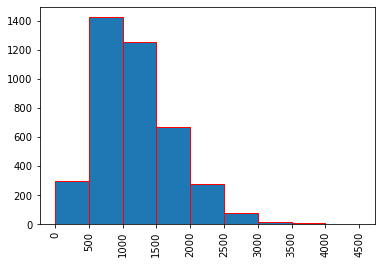

In [29]:
Maryland_Employment_Sort = Maryland_Employment_Sort.sort_values(by = 'Employment')

plt.hist(Maryland_Employment_Sort['Employment'],edgecolor = "red", bins=range(0,5000,500))
plt.xticks(range(0,5000,500), rotation=90)

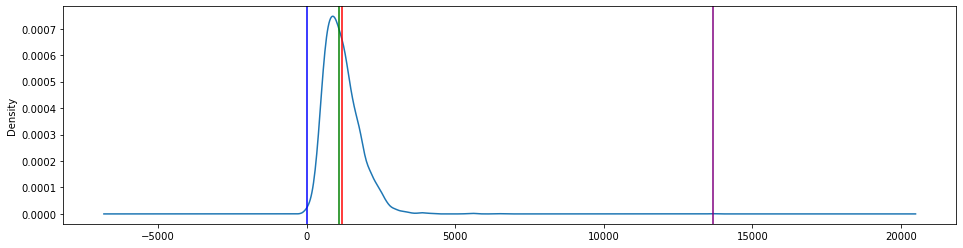

In [30]:
ax = Maryland_Employment_Sort['Employment'].plot(kind='density',figsize = (16,4))
ax.axvline(Maryland_Employment_Sort['Employment'].mean(),color='red')
ax.axvline(Maryland_Employment_Sort['Employment'].median(),color='green')
ax.axvline(Maryland_Employment_Sort['Employment'].min(),color='blue')
ax.axvline(Maryland_Employment_Sort['Employment'].max(),color='purple')

## Maryland Rooms Data

In [32]:
Maryland_Rooms = pd.read_csv('Maryland_Rooms_2020.csv')
Maryland_Rooms_Sort = Maryland_Rooms[1:]
Maryland_Rooms_Sort = Maryland_Rooms_Sort[["B25018_001E","GEO_ID","NAME"]]
Maryland_Rooms_Sort = Maryland_Rooms_Sort.rename(columns = {"B25018_001E":"Rooms","GEO_ID":"GEO_ID","NAME":"Name"})
Maryland_Rooms_Sort= Maryland_Rooms_Sort.sort_values(by="Rooms")
Maryland_Rooms_Sort

,Rooms,GEO_ID,Name
393,-,1500000US240039900000,"Block Group 0, Census Tract 9900, Anne Arundel..."
3115,-,1500000US240359900000,"Block Group 0, Census Tract 9900, Queen Anne's..."
3116,-,1500000US240359901000,"Block Group 0, Census Tract 9901, Queen Anne's..."
3117,-,1500000US240359902000,"Block Group 0, Census Tract 9902, Queen Anne's..."
3180,-,1500000US240379900000,"Block Group 0, Census Tract 9900, St. Mary's C..."
...,...,...,...
1639,9.0+,1500000US240253036051,"Block Group 1, Census Tract 3036.05, Harford C..."
1642,9.0+,1500000US240253036061,"Block Group 1, Census Tract 3036.06, Harford C..."
2134,9.0+,1500000US240317012102,"Block Group 2, Census Tract 7012.10, Montgomer..."
2135,9.0+,1500000US240317012103,"Block Group 3, Census Tract 7012.10, Montgomer..."


In [33]:
Maryland_Rooms_Sort['Rooms'] = Maryland_Rooms_Sort['Rooms'].replace('-','.0')
Maryland_Rooms_Sort['Rooms'] = Maryland_Rooms_Sort['Rooms'].replace('9.0+','0')

In [34]:
Maryland_Rooms_Sort['Rooms'] = Maryland_Rooms_Sort['Rooms'].astype(str).astype(float)
Maryland_Rooms_Sort = Maryland_Rooms_Sort.loc[(Maryland_Rooms_Sort['Rooms']>0)]
Maryland_Rooms_Sort['Rooms'].describe()

count    3580.000000
mean        6.106704
std         1.338066
min         1.400000
25%         5.200000
50%         6.200000
75%         7.100000
max         8.500000
Name: Rooms, dtype: float64

## Maryland Children Data

In [49]:
Maryland_Children = pd.read_csv('Maryland_Children_2020.csv')
Maryland_Children

,B11005_001E,B11005_001M,B11005_002E,B11005_002M,B11005_003E,B11005_003M,B11005_004E,B11005_004M,B11005_005E,B11005_005M,...,B11005_016E,B11005_016M,B11005_017E,B11005_017M,B11005_018E,B11005_018M,B11005_019E,B11005_019M,GEO_ID,NAME
0,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Households with one or more ...,Margin of Error!!Total:!!Households with one o...,Estimate!!Total:!!Households with one or more ...,Margin of Error!!Total:!!Households with one o...,Estimate!!Total:!!Households with one or more ...,Margin of Error!!Total:!!Households with one o...,Estimate!!Total:!!Households with one or more ...,Margin of Error!!Total:!!Households with one o...,...,Estimate!!Total:!!Households with no people un...,Margin of Error!!Total:!!Households with no pe...,Estimate!!Total:!!Households with no people un...,Margin of Error!!Total:!!Households with no pe...,Estimate!!Total:!!Households with no people un...,Margin of Error!!Total:!!Households with no pe...,Estimate!!Total:!!Households with no people un...,Margin of Error!!Total:!!Households with no pe...,id,Geographic Area Name
1,370,104,59,45,59,45,46,42,13,20,...,9,13,195,91,141,84,54,39,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County..."
2,793,140,222,69,222,69,149,57,73,53,...,20,22,203,88,108,70,95,51,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County..."
3,412,72,105,47,105,47,82,41,23,28,...,0,13,56,32,19,22,37,26,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County..."
4,366,160,39,37,39,37,23,25,16,23,...,0,13,132,71,98,63,34,24,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,241,73,0,13,0,13,0,13,0,13,...,11,11,204,72,119,61,85,53,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci..."
4076,231,71,47,53,47,53,0,13,47,53,...,19,28,159,60,42,35,117,55,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci..."
4077,484,119,186,94,186,94,0,13,186,94,...,31,43,251,81,56,42,195,74,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci..."
4078,474,105,185,73,185,73,0,13,185,73,...,61,43,213,87,85,58,128,67,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci..."


## Maryland HouseType Data

In [50]:
Maryland_HouseType = pd.read_csv('Maryland_HouseType_2020.csv')
Maryland_HouseType

,B11016_001E,B11016_001M,B11016_002E,B11016_002M,B11016_003E,B11016_003M,B11016_004E,B11016_004M,B11016_005E,B11016_005M,...,B11016_013E,B11016_013M,B11016_014E,B11016_014M,B11016_015E,B11016_015M,B11016_016E,B11016_016M,GEO_ID,NAME
0,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Family households:,Margin of Error!!Total:!!Family households:,Estimate!!Total:!!Family households:!!2-person...,Margin of Error!!Total:!!Family households:!!2...,Estimate!!Total:!!Family households:!!3-person...,Margin of Error!!Total:!!Family households:!!3...,Estimate!!Total:!!Family households:!!4-person...,Margin of Error!!Total:!!Family households:!!4...,...,Estimate!!Total:!!Nonfamily households:!!4-per...,Margin of Error!!Total:!!Nonfamily households:...,Estimate!!Total:!!Nonfamily households:!!5-per...,Margin of Error!!Total:!!Nonfamily households:...,Estimate!!Total:!!Nonfamily households:!!6-per...,Margin of Error!!Total:!!Nonfamily households:...,Estimate!!Total:!!Nonfamily households:!!7-or-...,Margin of Error!!Total:!!Nonfamily households:...,id,Geographic Area Name
1,370,104,175,69,123,54,0,13,22,24,...,0,13,0,13,0,13,0,13,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County..."
2,793,140,590,125,329,98,106,81,86,49,...,0,13,0,13,0,13,0,13,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County..."
3,412,72,356,74,219,64,86,53,46,38,...,0,13,0,13,0,13,0,13,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County..."
4,366,160,234,146,166,140,45,39,15,22,...,0,13,0,13,0,13,0,13,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,241,73,37,28,32,27,0,13,5,8,...,0,13,0,13,0,13,0,13,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci..."
4076,231,71,72,58,36,39,0,13,30,46,...,0,13,0,13,0,13,5,9,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci..."
4077,484,119,233,107,130,83,65,52,9,14,...,21,33,0,13,0,13,0,13,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci..."
4078,474,105,261,91,69,43,59,62,98,52,...,0,13,0,13,0,13,0,13,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci..."


## Maryland Age Data

In [51]:
Maryland_Age = pd.read_csv('Maryland_Age_2020.csv')
Maryland_Age

,B01002_001E,B01002_001M,B01002_002E,B01002_002M,B01002_003E,B01002_003M,GEO_ID,NAME
0,Estimate!!Median age --!!Total:,Margin of Error!!Median age --!!Total:,Estimate!!Median age --!!Male,Margin of Error!!Median age --!!Male,Estimate!!Median age --!!Female,Margin of Error!!Median age --!!Female,id,Geographic Area Name
1,49.8,16.1,43.5,17.2,53.0,16.9,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County..."
2,46.2,8.6,42.9,8.5,48.1,9.6,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County..."
3,57.2,6.2,59.2,8.3,55.6,6.9,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County..."
4,52.7,8.7,39.9,23.0,55.4,2.2,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County..."
...,...,...,...,...,...,...,...,...
4075,52.5,12.3,55.8,11.4,46.4,14.0,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci..."
4076,54.7,28.3,63.6,12.7,50.6,31.6,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci..."
4077,28.1,4.9,22.3,18.3,28.9,12.9,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci..."
4078,25.2,14.8,18.8,21.8,27.6,15.5,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci..."


## Maryland Transportation Data

In [52]:
Maryland_Transportation = pd.read_csv('Maryland_Transportation_2020.csv')
Maryland_Transportation

,B08134_001E,B08134_001M,B08134_002E,B08134_002M,B08134_003E,B08134_003M,B08134_004E,B08134_004M,B08134_005E,B08134_005M,...,B08134_117E,B08134_117M,B08134_118E,B08134_118M,B08134_119E,B08134_119M,B08134_120E,B08134_120M,GEO_ID,NAME
0,Estimate!!Total:,Margin of Error!!Total:,Estimate!!Total:!!Less than 10 minutes,Margin of Error!!Total:!!Less than 10 minutes,Estimate!!Total:!!10 to 14 minutes,Margin of Error!!Total:!!10 to 14 minutes,Estimate!!Total:!!15 to 19 minutes,Margin of Error!!Total:!!15 to 19 minutes,Estimate!!Total:!!20 to 24 minutes,Margin of Error!!Total:!!20 to 24 minutes,...,"Estimate!!Total:!!Taxicab, motorcycle, bicycle...","Margin of Error!!Total:!!Taxicab, motorcycle, ...","Estimate!!Total:!!Taxicab, motorcycle, bicycle...","Margin of Error!!Total:!!Taxicab, motorcycle, ...","Estimate!!Total:!!Taxicab, motorcycle, bicycle...","Margin of Error!!Total:!!Taxicab, motorcycle, ...","Estimate!!Total:!!Taxicab, motorcycle, bicycle...","Margin of Error!!Total:!!Taxicab, motorcycle, ...",id,Geographic Area Name
1,307,118,38,36,0,13,18,19,8,12,...,12,18,0,13,0,13,0,13,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County..."
2,667,172,16,22,37,33,58,59,150,94,...,0,13,0,13,0,13,0,13,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County..."
3,367,134,0,13,0,13,22,22,88,60,...,0,13,0,13,0,13,0,13,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County..."
4,353,150,21,35,13,20,29,31,105,58,...,0,13,0,13,0,13,0,13,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,116,60,21,25,8,12,13,15,0,13,...,6,9,0,13,0,13,0,13,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci..."
4076,110,119,0,13,48,53,0,13,32,53,...,0,13,0,13,0,13,0,13,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci..."
4077,230,133,0,13,12,18,14,22,20,32,...,0,13,0,13,0,13,0,13,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci..."
4078,289,124,6,10,74,60,20,33,73,70,...,0,13,0,13,0,13,0,13,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci..."


## Maryland HousePrice Data

In [53]:
Maryland_HousePrice = pd.read_csv('Maryland_HousePrice_2020.csv')
Maryland_HousePrice

,B25077_001E,B25077_001M,GEO_ID,NAME
0,Estimate!!Median value (dollars),Margin of Error!!Median value (dollars),id,Geographic Area Name
1,221800,23303,1500000US240010001001,"Block Group 1, Census Tract 1, Allegany County..."
2,164600,19870,1500000US240010001002,"Block Group 2, Census Tract 1, Allegany County..."
3,156500,22608,1500000US240010001003,"Block Group 3, Census Tract 1, Allegany County..."
4,157900,35574,1500000US240010002001,"Block Group 1, Census Tract 2, Allegany County..."
...,...,...,...,...
4075,96300,21899,1500000US245102805003,"Block Group 3, Census Tract 2805, Baltimore ci..."
4076,-,**,1500000US245102805004,"Block Group 4, Census Tract 2805, Baltimore ci..."
4077,-,**,1500000US245102806001,"Block Group 1, Census Tract 2806, Baltimore ci..."
4078,149400,143201,1500000US245102806002,"Block Group 2, Census Tract 2806, Baltimore ci..."


## Maryland School Data